<div style="text-align: center;">
    <div style="display: inline-block;">
        <img src="dependencies/ghr_libraries/clim4health/tutorials/figures/general/logo_bsc.png" width="275px" height="275px" />
    </div>
    <div style="display: inline-block;">
        <img src="dependencies/ghr_libraries/clim4health/tutorials/figures/general/logo_harmonize.png" width="130px" height="130px" />
    </div>
    <br></br
    <br></br>
    <h1>Tutorial: <code>clim4health</code></h1>
    <img src="dependencies/ghr_libraries/clim4health/tutorials/figures/general/logo_clim4health.svg" width="100" height="100" style="margin-left:-475px; margin-top: -300px;">


</div>
<hr style="border: 1px solid #000; width: 80%; margin: 20px auto;">

# 🧭 Table of Contents
Here’s what we’ll cover in this notebook:

- [1. Introduction](#1.-Introduction)
- [2. Setup and Data Loading](#2.-Setup-and-Data-Loading)
- [3. Download data](#3.-Download-data)
- [4. Load data](#4.-Load-data)
- [5. Mask data](#5.-Mask-data)
- [6. Time agregations](#6.-Time-agregations)
- [7. Spatial agregations](#7.-Spatial-agregations)

---
# 1. Introduction

clim4health is a tool developed within the HARMONIZE project with the aim of post-processing climate data harmonized to the spatiotemporal aggregation of health data. The tool consists in an R-package and its documentation including examples on how to use the tool and recommendations of parameter selection in some case studies.

<img src="dependencies/ghr_libraries/clim4health/tutorials/figures/general/clim4health_structure.png" width="800px" height="500px" />

---
# 2. Setup and Data Loading

In [ ]:
options(warn = -1)

In [1]:
setwd("dependencies/ghr_libraries/clim4health/")
path <- getwd()

install.packages("exactextractr")
install.packages("ecmwfr")

library(exactextractr)
library(ecmwfr)
library(sf)

source(paste0(path, '/functions/clim4health_load.R'))
source(paste0(path, '/functions/clim4health_index.R'))
source(paste0(path, '/functions/clim4health_time.R'))
source(paste0(path, '/functions/clim4health_spatial.R'))
source(paste0(path, '/functions/clim4health_get.R')) 

Installing package into 'C:/Users/rcapella/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'exactextractr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rcapella\AppData\Local\Temp\Rtmpg1y11V\downloaded_packages


Installing package into 'C:/Users/rcapella/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ecmwfr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rcapella\AppData\Local\Temp\Rtmpg1y11V\downloaded_packages


Warning message:
"package 'exactextractr' was built under R version 4.4.3"
Warning message:
"package 'ecmwfr' was built under R version 4.4.3"
Warning message:
"package 'sf' was built under R version 4.4.3"
Linking to GEOS 3.13.0, GDAL 3.10.1, PROJ 9.5.1; sf_use_s2() is TRUE


Attaching package: 's2dv'


The following object is masked from 'package:base':

    Filter



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: maps

Loading required package: qmap

Loading required package: fitdistrplus

Loading required package: MASS

Loading required package: survival

Loading required package: easyVerification

Loading required package: SpecsVerification


Attaching package: 'SpecsVerification'


The following object is masked from 'package:s2dv':

    Corr



Attaching package: 'easyVerification'


The following object is masked from 'package:SpecsVerification':

    EnsCorr


Warning messa

---
# 3. Download data

In [2]:
clim4health_get(pat = "1d6e6015-97b6-438f-848f-d8ac628d2014",
                dataset = "reanalysis-era5-land-monthly-means",
                product_type = "monthly_averaged_reanalysis",
                variable = "2m_temperature",
                year = c(2010, 2011, 2012),
                month = c(4, 5),
                area = c(33, -93, -23, -17),
                outname = "era5land")

---
# 4. Load data

In [3]:
data <- clim4health_load('./sample_data/ecmwf51/forecast/',var = "t2m", 
                         data_type = "fcst", sdates = "20240401", ext = 'nc')

Warning message:
"! Warning: Parameter 'merge_across_dims' is changed to FALSE because there is no
!   *_across argument."
Warning message:
"! Warning: Parameter 'pattern_dims' not specified. Taking the first dimension,
!   'dataset' as 'pattern_dims'."
Warning message:
"! Warning: Could not find any pattern dim with explicit data set descriptions (in
!   the form of list of lists). Taking the first pattern dim, 'dataset',
!   as dimension with pattern specifications."
Warning message:
"! Warning: Found dimension 'latitude' is required to reorder but no 'latitude_var'
!   provided. "latitude_var = 'latitude'" has been automatically added
!   to the Start call."
Warning message:
"! Warning: Found dimension 'longitude' is required to reorder but no
!   'longitude_var' provided. "longitude_var = 'longitude'" has been
!   automatically added to the Start call."
Warning message:
"! Warning: Not found any dimensions able to be split. The parameter
!   'split_multiselected_dims' is changed to

---
# 5. Mask data

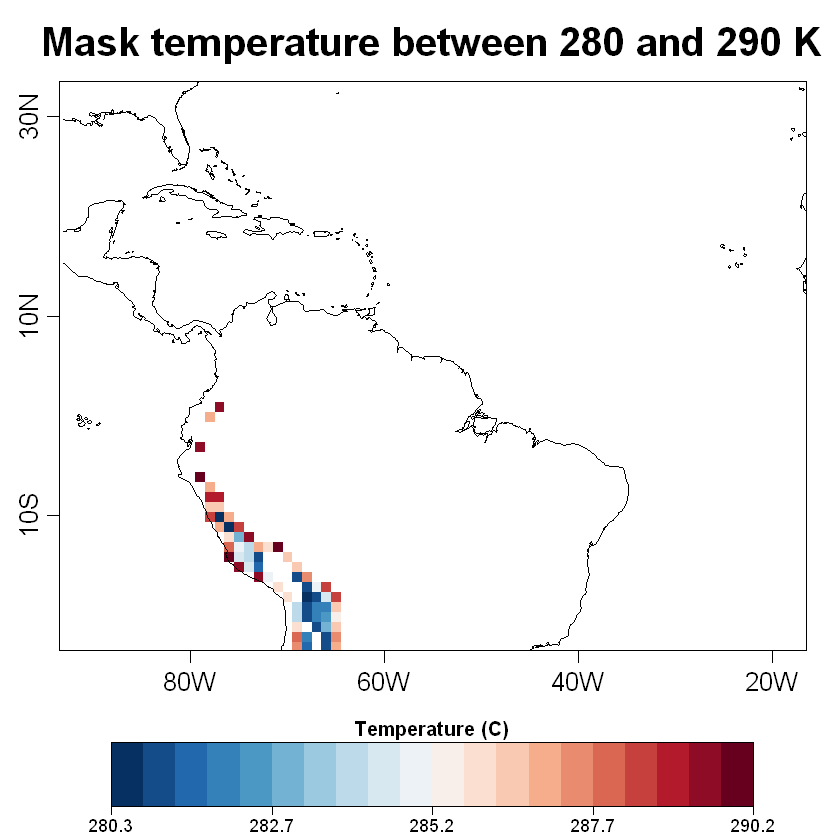

In [4]:
mask <- clim4health_index(data, mod_vals = TRUE,  lower_threshold = 280, upper_threshold = 290, lower_close = FALSE, upper_close = FALSE)

PlotEquiMap(var = mask$data[1, 1, 1, 1, , ],
            lat = mask$coords$latitude,
            lon = mask$coords$longitude,
            filled.continents = FALSE,
            units = 'Temperature (C)', # text to appear in the legend
            toptitle = 'Mask temperature between 280 and 290 K', # text to appear as overall title
            colNA = '#ffffff'
            )

---
# 6. Time agregations

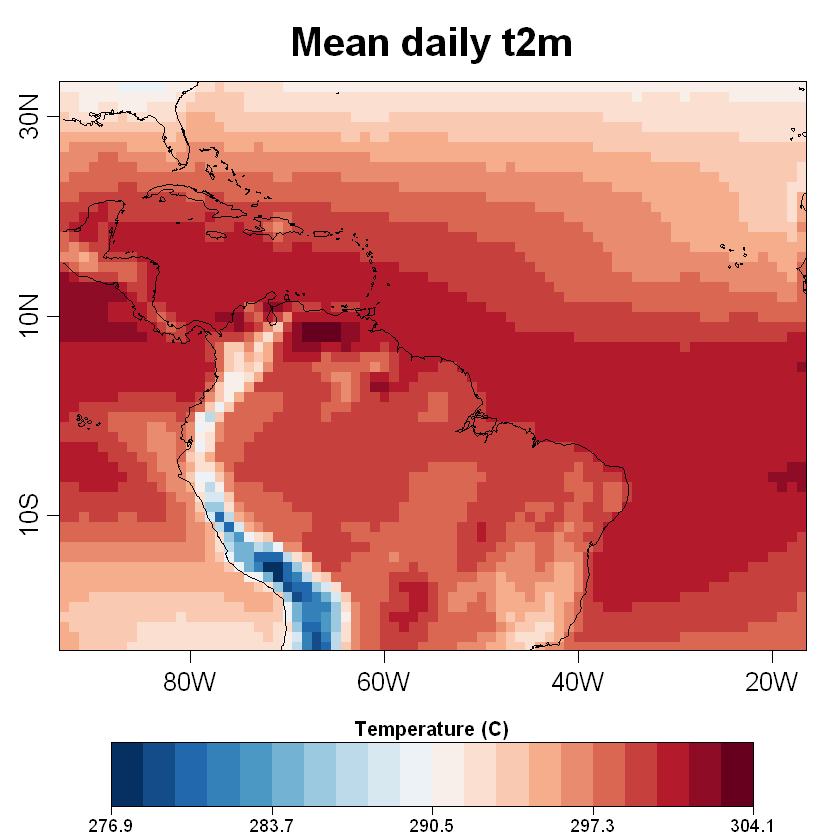

In [5]:
daily_data <- clim4health_time(data, aggregation = "daily")

PlotEquiMap(var = daily_data$data[1, 1, 1, 1, , ],
            lat = data$coords$latitude,
            lon = data$coords$longitude,
            filled.continents = FALSE,
            units = 'Temperature (C)', # text to appear in the legend
            toptitle = 'Mean daily t2m', # text to appear as overall title
            colNA = '#ffffff'
            )

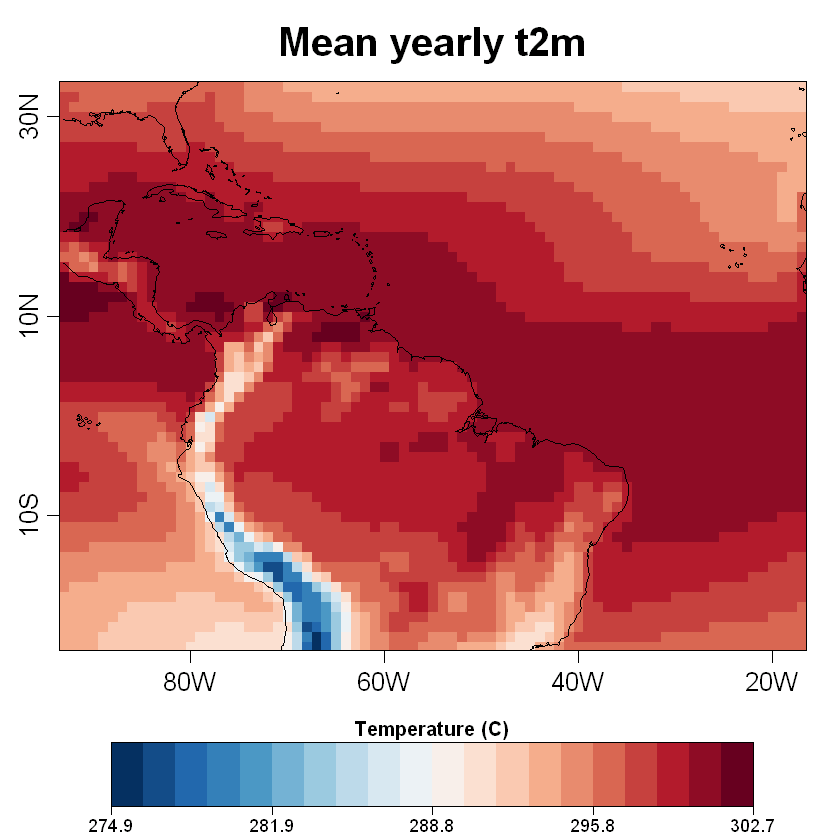

In [6]:
yearly_data <- clim4health_time(data, aggregation = "yearly")

 PlotEquiMap(var = yearly_data$data[1, 1, 1, 1,  , ],
            lat = data$coords$latitude,
            lon = data$coords$longitude,
            filled.continents = FALSE,
            units = 'Temperature (C)', # text to appear in the legend
            toptitle = 'Mean yearly t2m', # text to appear as overall title
            colNA = '#ffffff'
            )

---
# 7. Spatial agregations

In [7]:
shp_file <- paste0(path, "/sample_data/shapefiles/MGN_ANM_MPIOS.shp")
result   <- clim4health_spatial(data,  shp_file)

dim(result)

Reading layer `MGN_ANM_MPIOS' from data source 
  `C:\Users\rcapella\Documents\GitHub\personal_project\Training_CARPHA\dependencies\ghr_libraries\clim4health\sample_data\shapefiles\MGN_ANM_MPIOS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1122 features and 90 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -81.73562 ymin: -4.229406 xmax: -66.84722 ymax: 13.39473
Geodetic CRS:  MAGNA-SIRGAS


Warning message in CPL_crs_from_input(x):
"GDAL Message 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order."


  |======================================================================| 100%


dataset      var     time ensemble   region 
       1        1        3       51     1122